In [ ]:
!pip install numpy -q

In [ ]:
!pip install tensorflow -q

In [ ]:
!pip install matplotlib -q

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [6]:
N = 200
X = np.random.random(N) * 9 - 5
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

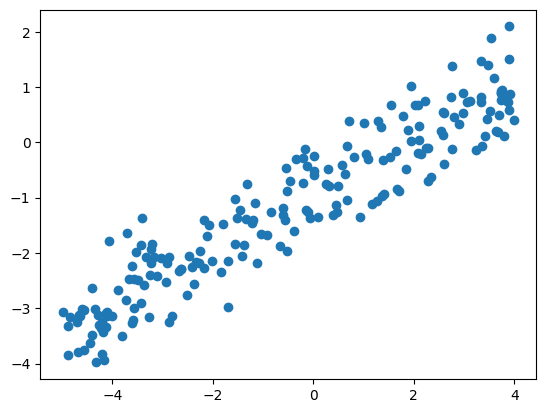

In [7]:
plt.scatter(X, y);

In [8]:
# Construir el modelo
# Es un tensor unidimensional con forma (1,), lo que significa que solo hay una característica para cada ejemplo de
i = Input(shape=(1,))
# Define una capa densa (totalmente conectada) con una unidad de salida. Esto significa que cada neurona en esta etapa está
x = Dense(1)(i)

modelo = Model(i, x)

<img src="./15-regresion_lineal_tensorflow/NVIDIA_Share_ySTAdYWo12.png" style="width:650px;hight:auto"></img>

In [10]:
modelo.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
modelo.compile(
    loss="mse",
    optimizer=Adam(learning_rate=0.1),
    metrics=["mae"]
)

In [12]:
r = modelo.fit(
    X.reshape(-1,1), y,
    epochs=800,
    batch_size=32
)

Epoch 1/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0533 - mae: 1.4047  
Epoch 2/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4335 - mae: 0.5292 
Epoch 3/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.8373 - mae: 0.7698
Epoch 4/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2743 - mae: 0.4210 
Epoch 5/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.3233 - mae: 0.4641
Epoch 6/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.2333 - mae: 0.3865
Epoch 7/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.2757 - mae: 0.4308
Epoch 8/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.2406 - mae: 0.3990
Epoch 9/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.2610 - mae: 0.4190
Epoch 10/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.2422 - mae: 0.3964
Epoch 11/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.2539 - mae: 0.4068
Epoch 12/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.2654 - mae: 0.4174
Epoch 13/800
7/7 ━━━━━━━━━━━━━━━━━━━

In [16]:
# Predicción
Xtest = np.linspace(-5, 4,20).reshape(-1, 1)
ptest = modelo.predict(Xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


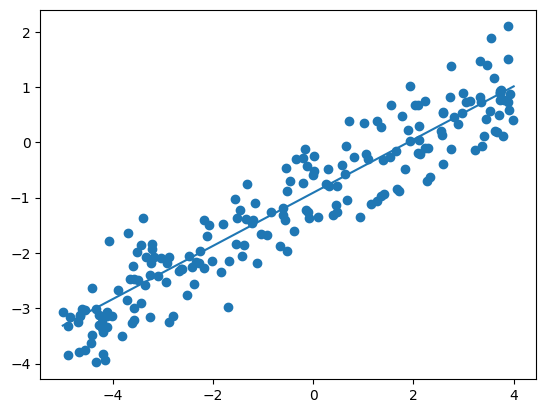

In [17]:
plt.scatter(X, y)
plt.plot(Xtest, ptest)

In [18]:
modelo.layers[1].get_weights()

[array([[0.4805847]], dtype=float32), array([-0.91028494], dtype=float32)]